In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
data=pd.read_csv("IRIS .csv")

In [52]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [54]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [56]:
data.shape

(150, 5)

In [57]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [58]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: >

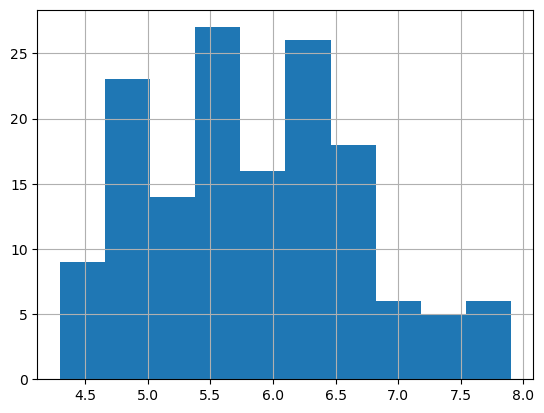

In [59]:
data['sepal_length'].hist()

<Axes: >

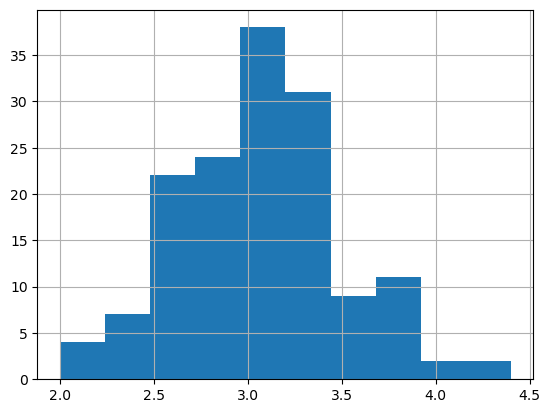

In [60]:
data['sepal_width'].hist()

<Axes: >

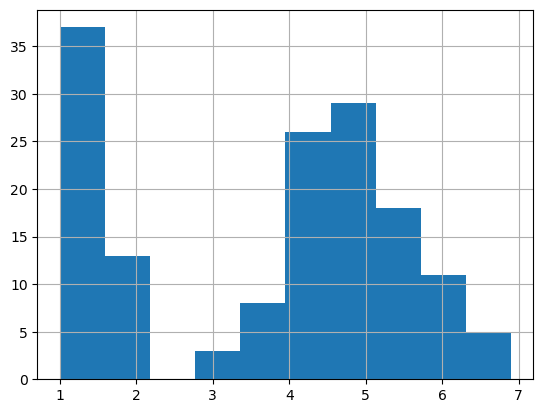

In [61]:
data['petal_length'].hist()

<Axes: >

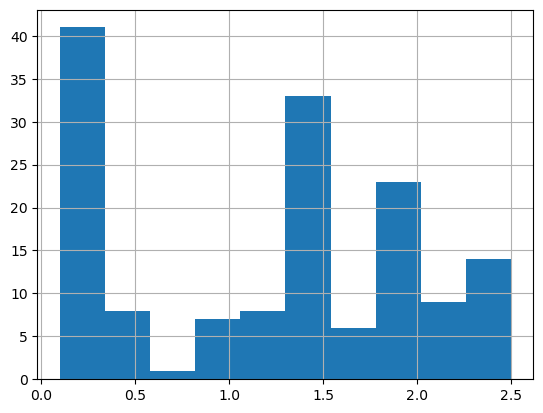

In [62]:
data['petal_width'].hist()

In [63]:
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

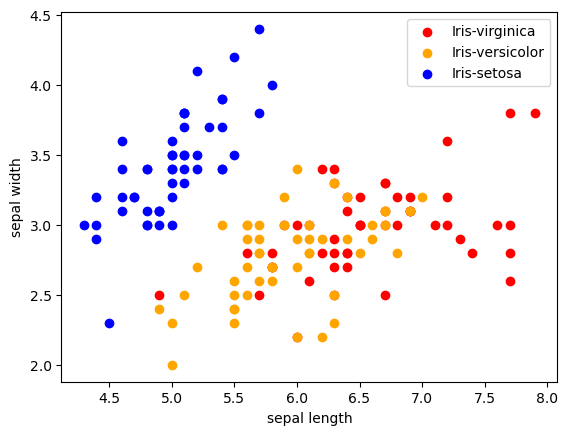

In [64]:
for  i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.legend()

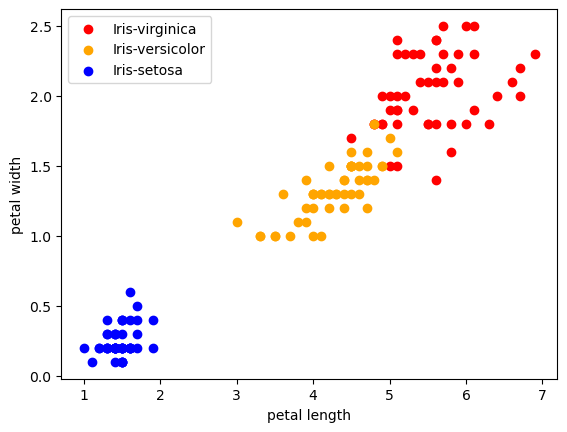

In [65]:
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend()

In [66]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [67]:
data['species']=label.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [68]:
from sklearn.model_selection import train_test_split
x=data.drop(columns=['species'])
y=data['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [69]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [70]:
model.fit(x_train,y_train)

C:\Users\sruthi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
y_pred=model.predict(x_test)
errors=(y_pred != y_test).sum()
errors

3

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Confusion Matrix:
[[21  0  0]
 [ 0 11  2]
 [ 0  1 10]]
Accuracy: 0.9333333333333333
Precision: 0.9351851851851851
Recall: 0.9333333333333333
F1 Score: 0.9334492753623187


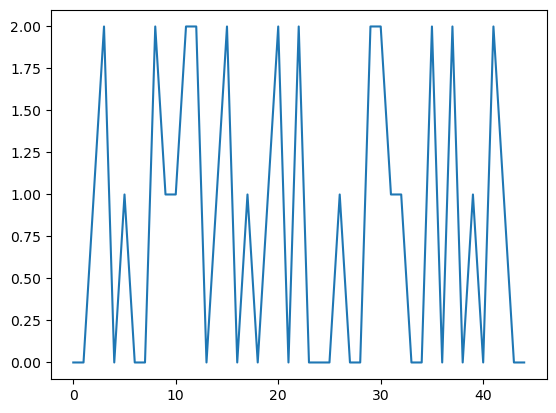

In [73]:
plt.plot(y_pred)

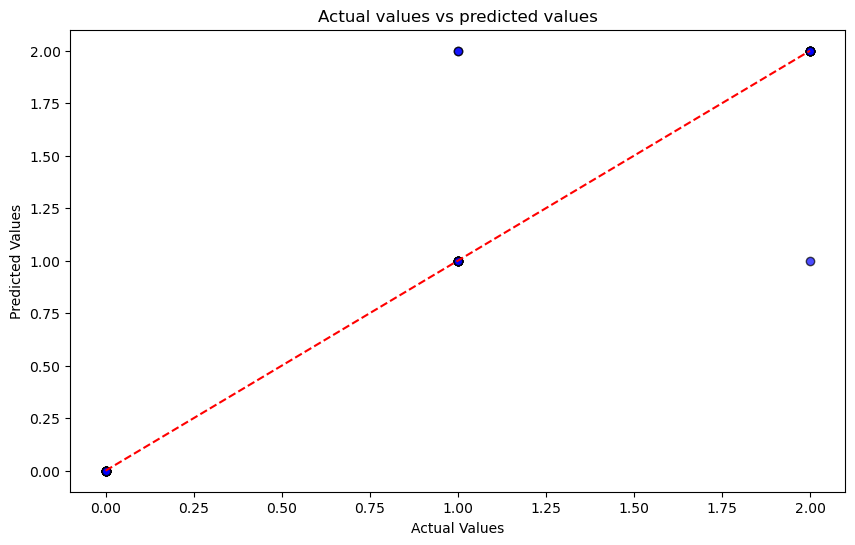

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color="blue",edgecolor='k',alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual values vs predicted values")
plt.show()